# SUMMARY EXERCISES 

The best way to properly get to grips with classes is by writing some, so here's some exercises:

## Exercise 1

 Define a class which has the following methods:
 * get_string: Take a string from console input (use the `input` builtin function)
 * \_\_init\_\_: This should call the get_string method when a class instance is initialized. 
 * print_string: Print the string
 * print_string_upper: Print the string in upper case.
 * print_string_lower: Print the string in lower case.

Test the class with some examples

In [1]:
class StringStuff():
    def __init__(self):
        self.s = ''
    
    def get_string(self):
        self.s = input()
    
    def print_string(self):
        print(self.s)
    
    def print_string_upper(self):
        print(self.s.upper())
        
    def print_string_lower(self):
        print(self.s.lower())

ex = StringStuff()
ex.get_string()
ex.print_string()
ex.print_string_lower()
ex.print_string_upper()

'AsasdSSdd'
'AsasdSSdd'
'asasdssdd'
'ASASDSSDD'


## Exercise 2

Write a class which is designed to store a population of foxes and chickens. Except the interface here is a bit strange, and you've been asked to design it in the following way. The class must contain:

 * An `__init__` method which takes two arguments `num_heads` and `num_legs`. `num_heads` is the total number of heads including both chickens and foxes. `num_legs` is the total number of legs including both chickens and foxes.
 * A `num_animals` method, which returns the number of chickens and the number of rabbits as a length-2 tuple. (Assume that all chickens have one head and two legs, and all foxes have one head and four legs).
 
Then test initializing the class and calling num_animals. Example outputs you should get:

 * `num_heads=2` and `num_legs=6` -> 1 fox, 1 chicken
 * `num_heads=30` and `num_legs=100` -> 20 foxes, 10 chickens
 * `num_heads=88` and `num_legs=238` -> 31 foxes, 57 chickens
 * `num_heads=5` and `num_legs=64` -> This case is not possible, raise an Exception. (`raise ValueError("MESSAGE")`)

In [2]:
class AnimalThing():
    def __init__(self, num_heads, num_legs):
        self.num_heads = num_heads
        self.num_legs = num_legs
    
    def num_animals(self):
        # C * 2 + (NH - C) * 4 = NL
        # 4*NH - NL = 2 * C
        if self.num_legs % 1:
            # Odd number of length
            raise ValueError("This combination is not possible")
        
        chickens = (4 * self.num_heads - self.num_legs) / 2
        rabbits = self.num_heads - chickens
        
        if chickens < 0 or rabbits < 0:
            raise ValueError("This combination is not possible")
        
        return rabbits, chickens


at = AnimalThing(2, 6)
print(at.num_animals())

at = AnimalThing(30, 100)
print(at.num_animals())

at = AnimalThing(88, 238)
print(at.num_animals())

at = AnimalThing(5, 64)
print(at.num_animals())


(1.0, 1.0)
(20.0, 10.0)
(31.0, 57.0)


ValueError: This combination is not possible

## Exercise 3

The last example is an example where the interface doesn't make sense. Why would you give num_heads and num_legs when the obvious thing to count is the number of both animals! Let's try and extend this into a somewhat more challenging example where the benefits of using object oriented programming beging to come into play.

Write a class to track the population of foxes and chickens over time. It should have the following methods:

* An `__init__` method which takes two arguments `num_foxes` and `num_chickens`. These correspond to the *initial* number of foxes and chickens.
* An `add_foxes` method. This should take one argument `num` and when called should increase the number of foxes by `num`. (Maybe the foxes are migrating??)
* An `add_chickens` method. As with `add_foxes` this should take one argument `num` and when called should increase the number of chickens by `num`. (Maybe the chickens migrate as well??)
* An `advance_time_one_year` method. This takes no arguments. When called it simulates how these populations would change over a year. This is done with the following steps. Consider if each of these steps should be individual methods in the class, or just all things that are done in `advance_time_one_year`. These three items should be done *in this order* (so the number of chickens increased in the first item affects the calculation in the third). Where these numbers give fractional numbers of chickens or foxes round *down* to the nearest integer.
  * Increase number of chickens proportionally to chicken population. The number of *additional* chickens is `num_chickens` * 0.6.
  * Decrease number of chickens proportionally to fox population. The number of chickens decreases by `num_foxes` * 4. (This number cannot become less than 0).
  * Change fox population proportionally to chicken *and* fox population. Use the following logic to determine this:
    * If `num_chickens` > `num_foxes` * 4 then add 0.5 * `num_foxes` new foxes.
    * If `num_chickens` > `num_foxes` * 2 then add (((`num_chickens`/`num_foxes`) - 2) * 0.25 * `num_foxes`) new foxes.
    * If `num_chickens` <= `num_foxes` * 2 then reduce the number of foxes by ((2 - (`num_chickens`/`num_foxes`)) * 0.25 * `num_foxes`)
    
Then try the following. Initiate the class with 1000 chickens, and 50 foxes. Evolve and store the population of both animals over 20 years. Plot how the population evolves.

You should find that this is not a stable ecosystem. Is it possible to edit some of the parameters above so that you have a *dynamic* ecosystem (e.g. the populations should change over time and respond to each other) but one that will not result in both sets of animals quickly disappearing, or that will result in an unckecked increase in one population?

In [3]:
class AnimalThingTwo():
    def __init__(self, num_chickens, num_foxes):
        self.num_chickens = num_chickens
        self.num_foxes = num_foxes
    
    def add_foxes(self, num_foxes):
        self.num_foxes += num_foxes
        if self.num_foxes < 0:
            self.num_foxes = 0 # :-(
        
    def add_chickens(self, num_chickens):
        self.num_chickens += num_chickens
        if self.num_chickens < 0:
            self.num_chickens = 0 # :-(
        
    def advance_time_one_year(self):
        self.add_chickens(int(0.6 * self.num_chickens))
        self.add_chickens(int(- 4 * self.num_foxes))
        if self.num_chickens > self.num_foxes*4:
            self.add_foxes(int(0.5 * self.num_foxes))
        else:
            # Note the second and third conditions are not different, the number just gets negative!
            self.add_foxes(int((self.num_chickens / self.num_foxes - 2) * 0.25 * self.num_foxes))
            
class AnimalThingStable():
    def __init__(self, num_chickens, num_foxes):
        self.num_chickens = num_chickens
        self.num_foxes = num_foxes
    
    def add_foxes(self, num_foxes):
        self.num_foxes += num_foxes
        if self.num_foxes < 0:
            self.num_foxes = 0 # :-(
        
    def add_chickens(self, num_chickens):
        self.num_chickens += num_chickens
        if self.num_chickens < 0:
            self.num_chickens = 0 # :-(
        
    def advance_time_one_year(self):
        # Use this and the populations will disappear:
        # self.add_chickens(int(0.699357903060 * self.num_chickens))
        # Use this and the populations will explode
        self.add_chickens(int(0.699357903070 * self.num_chickens))
        # This really is balanced on a knife-edge. Unless the parameters are *exactly* tuned such systems
        # are not stable. (In reality different/additional controls on the populations are needed to keep this stable).
        self.add_chickens(int(- 4 * self.num_foxes))
        if self.num_chickens > self.num_foxes*4:
            self.add_foxes(int(0.5 * self.num_foxes))
        else:
            # Note the second and third conditions are not different, the number just gets negative!
            self.add_foxes(int((self.num_chickens / self.num_foxes - 2) * 0.25 * self.num_foxes))

Year 0 Chickens: 1400 Foxes: 75
Year 1 Chickens: 1940 Foxes: 112
Year 2 Chickens: 2656 Foxes: 168
Year 3 Chickens: 3577 Foxes: 252
Year 4 Chickens: 4715 Foxes: 378
Year 5 Chickens: 6032 Foxes: 567
Year 6 Chickens: 7383 Foxes: 850
Year 7 Chickens: 8412 Foxes: 1275
Year 8 Chickens: 8359 Foxes: 1912
Year 9 Chickens: 5726 Foxes: 2387
Year 10 Chickens: 0 Foxes: 1194
Year 11 Chickens: 0 Foxes: 597
Year 12 Chickens: 0 Foxes: 299
Year 13 Chickens: 0 Foxes: 150
Year 14 Chickens: 0 Foxes: 75
Year 15 Chickens: 0 Foxes: 38
Year 16 Chickens: 0 Foxes: 19
Year 17 Chickens: 0 Foxes: 10
Year 18 Chickens: 0 Foxes: 5
Year 19 Chickens: 0 Foxes: 3


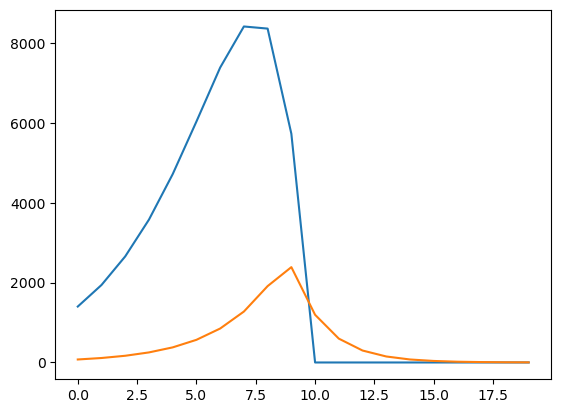

In [4]:
amt2 = AnimalThingTwo(1000, 50)
n_chickens = []
n_foxes = []

for year in range(20):
    amt2.advance_time_one_year()
    n_chickens.append(amt2.num_chickens)
    n_foxes.append(amt2.num_foxes)
    print("Year", year, "Chickens:", amt2.num_chickens, "Foxes:", amt2.num_foxes)

# You should make the plot look nicer than this and include axis labels etc.!!
from matplotlib import pyplot as plt
plt.plot(n_chickens)
plt.plot(n_foxes)

In [5]:
# No I can't keep this stable unless I create a system that is *not* dynamic (ie. I tune the parameters)
# so that the populations never change.
amt2 = AnimalThingStable(1000, 50)

for year in range(1000):
    amt2.advance_time_one_year()
print("Year", year, "Chickens:", amt2.num_chickens, "Foxes:", amt2.num_foxes)

Year 999 Chickens: 4597825123782512403940663656402514720920242935922474826237032536983928011004631378740866635851687113426633228031975235399680403353362365895300585782101605744025722279832743083776362925863293098581715396471734876411719962667793132 Foxes: 6135796327505989235727472356078700172383477942443873077356831410729146305162765536350373375775510798599136513330640118502771752673316007056148423671542581521901877597060593139309


## Exercise 4

Challenging exercise. Construct a class that can be used to play a game of noughts and crosses. The class should have at least the following methods:

 * `__init__`: Create an empty 3 x 3 board (represented by some form of list-like object).
 * `place_nought`: Place a nought at a position on the board (the position is given by arguments to this method).
 * `place_cross`: Place a cross at a position on the board (the position is given by arguments to this method).
 * `print_board`: Print a representation of the board to the terminal
 * `restart_game`: Revert to an empty 3 x 3 board
 
Whenever a nought, or a cross, is played, the following should happen:

 * Noughts and crosses must be played in alternating order, if someone tries to play out of order a message should be given, but the game allowed to continue
 * You cannot place a piece on a space that already has a piece on it. Print a message if this happens and continue the game.
 * Whenever a piece is played check to see if one player has won. Print a message if this happens.
 * If all spaces on the board are full and no-one has won, print a message to that effect.

In [1]:
class NoughtsAndCrosses():
    # FILL IN CLASS HERE!
    
    

# Some example games to test. Do not change!
oandc = NoughtsAndCrosses()
oandc.print_board()
oandc.place_nought(0,1)
# This one below should not go through: It's not nought's turn.
oandc.place_nought(1,1)
oandc.print_board()
oandc.place_cross(1,1)
oandc.place_nought(0,0)
# This shouldn't go through as you can't play a cross on a nought.
oandc.place_cross(0,0)
oandc.place_cross(2,2)
oandc.place_nought(0,2)
# Nought wins

oandc = NoughtsAndCrosses()
oandc.print_board()
oandc.place_nought(1,1)
oandc.place_cross(0,0)
oandc.place_nought(0,2)
oandc.place_cross(2,0)
oandc.place_nought(1,0)
oandc.place_cross(1,2)
oandc.place_nought(0,1)
oandc.place_cross(2,1)
oandc.place_nought(2,2)
# DRAW




IndentationError: expected an indented block (139590512.py, line 7)

In [6]:
import numpy
class NoughtsAndCrosses():
    def __init__(self):
        self.board = numpy.zeros([3,3])
        self.current_player = None
    
    def print_board(self):
        for i in range(3):
            curr_line = ''
            for j in range(3):
                if self.board[i,j] == -1:
                    curr_line += "O"
                elif self.board[i,j] == 1:
                    curr_line += "X"
                elif self.board[i,j] == 0:
                    curr_line += "*"
            print(curr_line)
        print()
    
    def place_nought(self, i, j):
        if self.current_player == 'crosses':
            print("It's not nought's turn!")
            return
        if not self.board[i,j] == 0:
            print("That square already has a piece on it")
            return
        self.board[i,j] = -1
        self.current_player = 'crosses'
        self.check_board_status()
    
    def place_cross(self, i, j):
        if self.current_player == 'noughts':
            print("It's not nought's turn!")
            return
        if not self.board[i,j] == 0:
            print("That square already has a piece on it")
            return
        self.board[i,j] = 1
        self.current_player = 'noughts'
        self.check_board_status()
    
    def check_board_status(self):
        # Check horizontal and vertical rows
        diag_sum = self.board[0,0] + self.board[1,1] + self.board[2,2]
        diag_sum2 = self.board[0,2] + self.board[1,1] + self.board[2,0]
        for i in range(3):
            if self.board[i,:].sum() == 3 or self.board[:,i].sum() == 3 or diag_sum == 3 or diag_sum == 3:
                print("CROSSES WIN")
                self.print_board()
            if self.board[i,:].sum() == -3 or self.board[:,i].sum() == -3 or diag_sum == -3 or diag_sum == -3:
                print("NOUGHTS WIN")
                self.print_board()
        
        # Check if any values are 0
        if not (self.board == 0).any():
            print("GAME IS A DRAW")
            self.print_board()    

# Some example games to test. Do not change!
oandc = NoughtsAndCrosses()
oandc.print_board()
oandc.place_nought(0,1)
# This one below should not go through: It's not nought's turn.
oandc.place_nought(1,1)
oandc.print_board()
oandc.place_cross(1,1)
oandc.place_nought(0,0)
# This shouldn't go through as you can't play a cross on a nought.
oandc.place_cross(0,0)
oandc.place_cross(2,2)
oandc.place_nought(0,2)
# Nought wins

oandc = NoughtsAndCrosses()
oandc.print_board()
oandc.place_nought(1,1)
oandc.place_cross(0,0)
oandc.place_nought(0,2)
oandc.place_cross(2,0)
oandc.place_nought(1,0)
oandc.place_cross(1,2)
oandc.place_nought(0,1)
oandc.place_cross(2,1)
oandc.place_nought(2,2)
# DRAW




***
***
***

It's not nought's turn!
*O*
***
***

That square already has a piece on it
NOUGHTS WIN
OOO
*X*
**X

***
***
***

GAME IS A DRAW
XOO
OOX
XXO

